# Apple Stock Price Data Exploration 
### Milestone 3A
#### Angela Jiang, Alexander Lin, Jason Shen

### Planning it out
We were deciding between two different methods of grabbing the stock data. 
1. via API calls from [Quandl](https://www.quandl.com/docs/api)
2. via direct CSV download from NASDAQ 

We decided on the second because it would be simpler for the purposes of the project.

For initial exploration of data we thought about some of the aspects of the data that we would be interested in seeing. The data gives us a couple of metrics to work with:

* Close - The price of the stock at the end of the trading day.
* Open - The price of the stock at the beginning of the trading day.
* Volume - The number of shares that were traded that day
* High - The peak price of the stock for that day
* Low - The lowest price of the stock for that day

What sort of relationships between these metrics did we want to see?

1. We can look at how a given metric can change over different windows/intervals of time. For example, how the closing price changed over the course of the last month versus the change over the last year.

2. Which metrics are more meaningful?

      We're not really sure yet, so we should probably have a function that takes in the metric as a parameter and graphs accordingly.

3. We may want to see how two or more metrics may or may not correlate with one another
    
      Ex: Does volume of trade have a relationship with the closing price of the day?
        
      We may want to be able to plot more than one metric on a single graph to be able to look at these relationships.
    
    
We created functions that would allow us to generate these relationships with greater ease.

* filter_data_by_date
  * Allows us to choose the time interval we want to look at and filters the data to match this interval
  
* plot_stock_data
  * Function that lets us be flexible and plots the metric of our choosing.
  * Currently only plots one graph at a time
  * Allowed the option to graph the linear regression line on top of the data.

### Basic Exploration

After importing our CSV and arbitrarily choosing **closing price** to be our metric for exploration --

1. We started graphing out the data points over different intervals of time.

2. We ran some simple linear regressions for each time interval and subsequently graphed those as well.

For time intervals, we chose to explore the closing prices over the intervals of
* 10 years
* 1 year
* 6 months
* 1 month

We then peformed linear regression and plotted them on all of these to get a better visual sense of how well a linear model might fit.

Lastly we did some visualization of basic inter-metric relationship by plotting both the high and low prices of the stock price over a 10 year period. It was kind of hard to make any real sense out of the plot, since the values are so close to eachother. The only thing the graph really lets you see are weird anamolies in the data like the one in mid 2015 where the low price took a sharp dip.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from datetime import timedelta
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
import math
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
aapl_data = pd.read_csv('AAPL.csv', parse_dates = [0], keep_date_col = True)
aapl_data.head(n=5)

date   close      volume    open    high     low
0 2016-11-04  108.84  30790930.0  108.53  110.25  108.11
1 2016-11-03  109.83  26538700.0  110.98  111.46  109.55
2 2016-11-02  111.59  28174980.0  111.40  112.35  111.23
3 2016-11-01  111.49  43403760.0  113.46  113.77  110.53
4 2016-10-31  113.54  26378910.0  113.65  114.23  113.20

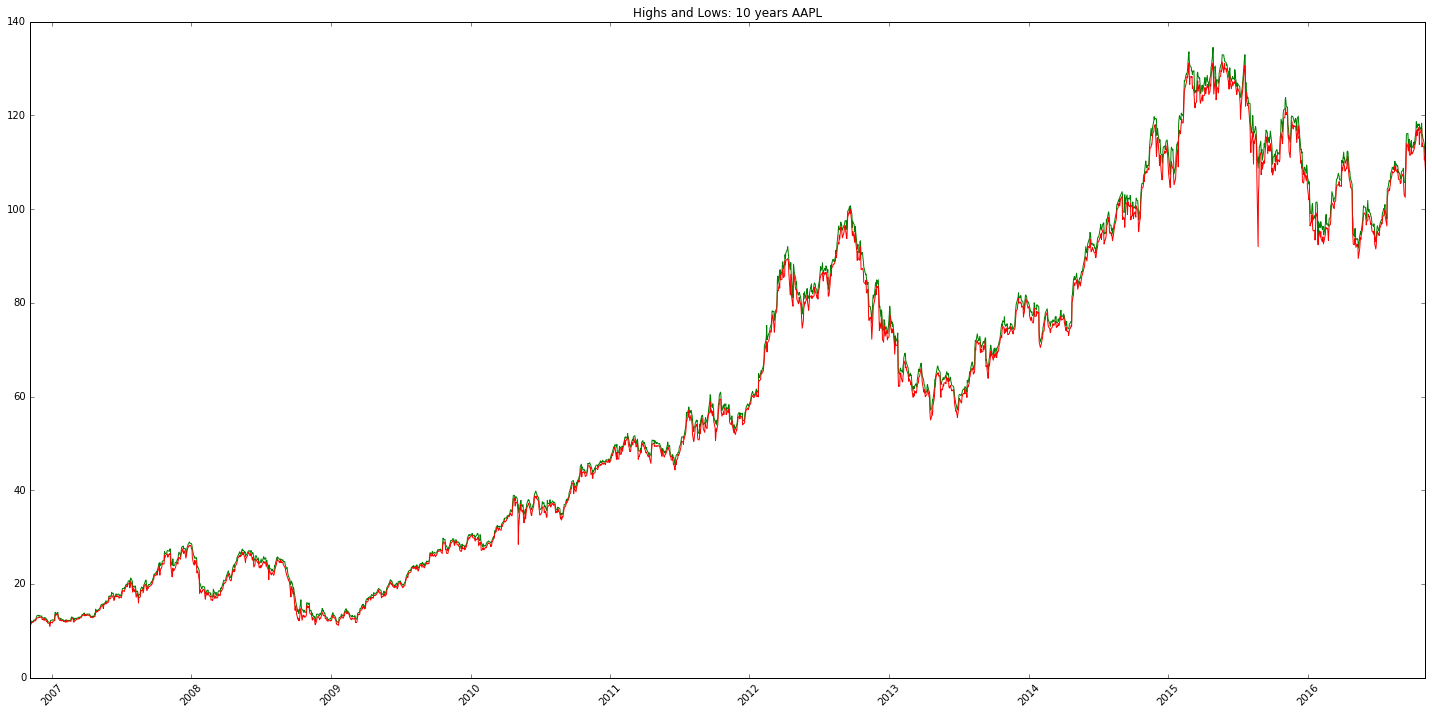

In [4]:
""" Function that filters stock data according to the input start and end dates (inclusive)
    Input and output data are pandas dataframes """
def filter_data_by_date(data, date_start, date_end):
    return data[(data['date'] >= date_start) & (data['date'] <= date_end)]

""" Function plots graph of data
        data: a dataframe
        ax: axis to be plotted on 
        option: 'close' (default), 'volume', 'open', 'high', or 'low' 
        title: title of the plot (string) 
        lin_reg: whether to fit and plot LR line
        color: color of line """
def plot_stock_data(data, ax, option="close", title="", lin_reg=False, color='b'):
    ax.set_title(title)
    ax.plot(data['date'].values, data[option].values, c=color)
    
    if(lin_reg):
        lin_reg = linear_model.LinearRegression()
        x_vals = np.arange(len(data['date'].values)).reshape(len(data['date'].values),1)
        lin_reg.fit(x_vals, data[option].values)
        y = lin_reg.predict([[0],[len(data['date'].values)-1]])
        ax.plot([data['date'].values[0], data['date'].values[len(data['date'].values)-1]], y, c='black')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plot_stock_data(aapl_data, ax[0][0], title="Closing Prices: 10 years AAPL", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2015-1-1', '2015-12-31'), ax[0][1], title="Closing Prices: 1 year AAPL: 2015", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2016-7-1', '2016-12-31'), ax[1][0], title="Closing Prices: 6 months AAPL: 2016", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2016-10-1', '2016-10-31'), ax[1][1], title="Closing Prices: 1 month OCT 2016 AAPL", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2016-10-1', '2016-10-31'), ax[1][1], option='high', title="Closing Prices: 1 month OCT 2016 AAPL", color='g')
plot_stock_data(filter_data_by_date(aapl_data,'2016-10-1', '2016-10-31'), ax[1][1], option='low', title="Closing, high, and low prices: 1 month OCT 2016 AAPL", color='r')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_stock_data(aapl_data, ax, option='high', title="Highs and Lows: 10 years AAPL", color='g')
plot_stock_data(aapl_data, ax, option='low', title="Highs and Lows: 10 years AAPL", color='r')
plt.tight_layout()
plt.show()

### Next steps
* We looked at potential sources for news data. It turns out that the API we wanted to use (www.newsapi.com) does not allow us to access historical news articles and only what was most recently published. We tried looking at other sources, and here is what we found:

-- Bloomberg API seems to be geared more torwards financial data than data from Bloomberg News.

-- Google News API has depreciated, but there is a Bing API that allows for News Search. We decided that it would be too broad for our purposes, since we are going to currently restrict our model to working with one news source.

-- Other, smaller news outlets that are technology oriented do not really have APIs.

-- We realized our best choice was actually to stick with the NYT News API, specifically the Times Newswire API. We can look at news that is filtered by certain dates and in a certain section of the Times (Technology or Business), and we can specifically look for headlines containing the company name.

In [5]:
import urllib2
import json

In [65]:
import time
from functools import wraps


def retry(ExceptionToCheck, tries=4, delay=3, backoff=2, logger=None):
    """Retry calling the decorated function using an exponential backoff.

    http://www.saltycrane.com/blog/2009/11/trying-out-retry-decorator-python/
    original from: http://wiki.python.org/moin/PythonDecoratorLibrary#Retry

    :param ExceptionToCheck: the exception to check. may be a tuple of
        exceptions to check
    :type ExceptionToCheck: Exception or tuple
    :param tries: number of times to try (not retry) before giving up
    :type tries: int
    :param delay: initial delay between retries in seconds
    :type delay: int
    :param backoff: backoff multiplier e.g. value of 2 will double the delay
        each retry
    :type backoff: int
    :param logger: logger to use. If None, print
    :type logger: logging.Logger instance
    """
    def deco_retry(f):

        @wraps(f)
        def f_retry(*args, **kwargs):
            mtries, mdelay = tries, delay
            while mtries > 1:
                try:
                    return f(*args, **kwargs)
                except ExceptionToCheck, e:
                    msg = "%s, Retrying in %d seconds..." % (str(e), mdelay)
                    if logger:
                        logger.warning(msg)
                    else:
                        print msg
                    time.sleep(mdelay)
                    mtries -= 1
                    mdelay *= backoff
            return f(*args, **kwargs)

        return f_retry  # true decorator

    return deco_retry

@retry(urllib2.HTTPError, tries=4, delay=3, backoff=2)
def get_url_with_retry(url):
    response = urllib2.urlopen(url)
    text = response.read()
    test = json.loads(text)
    response.close()
    return test
    
def get_news_by_time(sections, time_limit, api_key):
    df = pd.DataFrame(columns=('title', 'abstract', 'publish_date'))
    
    # inital api call
    url1 = 'http://api.nytimes.com/svc/news/v3/content/all/{}/{}.json?api-key={}&offset={}'.format(sections, time_limit, api_key, 0)
    url2 = 'http://api.nytimes.com/svc/archive/v1/2015/9.json?api-key={api_key}'

    test = get_url_with_retry(url2)
    
    # get num results
    num_results = test
    print num_results
#     # calc additional calls needed
#     num_iter = (num_results/20)
    
#     offset = 10
    
#     for index, result in enumerate(test['results']):
#         df.loc[index + offset*20] = [result['title'], result['abstract'], result['published_date']]
    
#     track = 10
    
#     for x in range(num_iter):
#         url = 'http://api.nytimes.com/svc/news/v3/content/all/{}/{}.json?api-key={}&offset={}'.format(sections, time_limit, api_key, (x+1)*20)
#         test = get_url_with_retry(url)
        
#         if (((x+1)*20.0)/num_results) * 100 > track:
#             print (((x+1)*20.0)/num_results)*100
#             track += 10

#         for index, result in enumerate(test['results']):
#             df.loc[index + (x+1)*20] = [result['title'], result['abstract'], result['published_date']]

    return df
    

In [66]:
get_news_by_time('business;technology', 10*365*24, '6ea877cfc23749dfb2c73a2e3fa527f5')

HTTP Error 403: Forbidden, Retrying in 3 seconds...
HTTP Error 403: Forbidden, Retrying in 6 seconds...
HTTP Error 403: Forbidden, Retrying in 12 seconds...


KeyboardInterrupt: 

In [56]:
ten_year_data = get_news_by_time('business;technology', 10*365*24, '6ea877cfc23749dfb2c73a2e3fa527f5')

4707


KeyboardInterrupt: 

In [26]:
ten_year_data = ten_year_data.reset_index(drop=True)
ten_year_data.head(n=5)
ten_year_data.to_csv('10_years_data.csv', sep=',', encoding = 'cp1252', index=False)

In [11]:
df = pd.read_csv('10_years_data.csv', parse_dates = [2], keep_date_col = True, encoding = 'cp1252')
print 'Number of total articles:', df.shape[0]

import string 
from six.moves.html_parser import HTMLParser

""" data = pandas dataframe with columns 'publish_date', 'title', 'abstract'
    option = 'title' or 'abstract' (default = 'title')
    date_filer = (start date, end date) inclusive; else if default = None, then no filter 
    word_filter = list of words to filter OPTION by (CASE SENSITIVE); default is None """
def filter_data(data, option = 'title', date_filter = None, word_filter = None):
    h = HTMLParser()
    
    # filter by dates
    if date_filter is not None:
        start_date, end_date = date_filter
        filtered_data = data[(data['publish_date'] >= start_date) & (data['publish_date'] <= end_date)]
    else:
        filtered_data = data
            
    # filter by words
    if word_filter is not None:
        idx_to_drop = [] # store indices of rows that do not contain filter words
        
        # for every article
        for i in range(filtered_data.shape[0]):
            text = filtered_data.iloc[i][option]
            # iterates through each filter word
            filter_flag = 0
            # if there is no text (type is not string)
            if isinstance(text, basestring) is False:
                idx_to_drop.append(i)
                continue
            for word in word_filter:
                if word in text:
                    filter_flag = 1
                    break
            if filter_flag == 0:
                idx_to_drop.append(i)
    
    # drops rows without words in filter
    filtered_data = filtered_data.drop(filtered_data.index[idx_to_drop])
    
    # remove capitalization
    filtered_data[option] = filtered_data[option].str.lower()
    
    # remove punctuation
    # remove html encoding puncuation from old news
    html_encoding = ['&#8217;', '&#8212;', '&#038;', '&#8230;', '&#8220;', '&#8221;']
    for i in range(filtered_data.shape[0]):
        for encoding in html_encoding:
            if encoding in filtered_data.iloc[i][option]:
                index = filtered_data.index[i]
                filtered_data.loc[index, option] = filtered_data.loc[index, option].replace(encoding, h.unescape(encoding))
    
    # remove other punctuation
    punctuation = list(',.!@#$%^&*()\'\"`:;?' + u'\u2018' + u'\u2019')
    for c in punctuation:
        filtered_data[option] = filtered_data[option].str.replace(c, '')
    
    # remove stop words
    for i in range(filtered_data.shape[0]):
        headline = filtered_data.iloc[i][option]
        headline = headline.split()
        new_headline = []
        for word in headline:
            if word not in stopwords.words('english'):
                new_headline += [word]
        
        index = filtered_data.index[i]
        filtered_data.loc[index, option] = ' '.join(new_headline)
                    
    return filtered_data

# makes bag of words given a pre-filtered DF and the option of using title or abstract
def make_bag_of_words(df, option = 'title'):
    num_articles = df.shape[0]
    words_lst = []
    for i in range(num_articles):
        words_lst += df.iloc[i][option].split()
        
    unique_words = list(set(words_lst))
    print '\nNumber of unique words across all text (including stopwords):', len(unique_words)
    
    # new predictors
    bag_words = np.zeros((df.shape[0], len(unique_words)))
    
    # text of words is a list
    for i in range(num_articles):
        text = df.iloc[i][option].split()
        for word in text:
            word_col_num = unique_words.index(word)
            bag_words[i, word_col_num] += 1
    
    print unique_words[:20]
    print bag_words[:5, :20]
    
    return bag_words, unique_words
    
filtered_df = filter_data(df, word_filter = ['Apple', 'AAPL', 'iPhone', 'iPod', 'Mac', 'MacBook'], option = 'abstract')
print 'Number of articles after filtering:', filtered_df.shape[0]
bag_words, unique_words = make_bag_of_words(filtered_df, option = 'abstract')

Number of total articles: 4687
Number of articles after filtering: 244

Number of unique words across all text (including stopwords): 1690
[u'funereal', u'todays', u'facilities', u'saved', u'assembled', u'forget', u'looking', u'founder', u'patched', u'translation', u'rise', u'dell', u'tidbits', u'handling', u'every', u'jack', u'vast', u'companies', u'wednesday', u'monsanto']
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]


In [12]:
# Number of Top words to Look At
num_top_words = 50

# Count the number of time each word occurs in the entire dataset
word_freq = bag_words.sum(axis=0)
print word_freq.shape

words = zip(word_freq, unique_words)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:num_top_words]

print top_words

(1690L,)
[(139.0, u'apple'), (83.0, u'iphone'), (54.0, u'apples'), (25.0, u'software'), (24.0, u'new'), (17.0, u'iphones'), (17.0, u'company'), (16.0, u'sales'), (14.0, u'may'), (14.0, u'one'), (14.0, u'jobs'), (14.0, u'google'), (13.0, u'like'), (12.0, u'tech'), (12.0, u'said'), (12.0, u'products'), (11.0, u'still'), (11.0, u'operating'), (11.0, u'app'), (10.0, u'would'), (10.0, u'phone'), (10.0, u'help'), (10.0, u'7'), (10.0, u'ipod'), (10.0, u'system'), (9.0, u'att'), (9.0, u'music'), (9.0, u'online'), (9.0, u'many'), (9.0, u'pay'), (9.0, u'latest'), (9.0, u'microsoft'), (9.0, u'steve'), (8.0, u'phones'), (8.0, u'even'), (8.0, u'says'), (8.0, u'mac'), (8.0, u'first'), (8.0, u'say'), (8.0, u'price'), (8.0, u'two'), (8.0, u'look'), (8.0, u'use'), (7.0, u'companies'), (7.0, u'mr'), (7.0, u'free'), (7.0, u'make'), (7.0, u'update'), (7.0, u'fbi'), (7.0, u'market')]


In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Number of bars to use
indices = np.arange(num_top_words)
#Where to put the label under each bar
width = 0.5
#Bar plot of the frequencies of the top words
ax.bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax.set_ylabel('Frequency')
ax.set_title('Top ' + str(num_top_words) + ' Words')

#Label the bars with the top words
ax.set_xticks(indices + width)
ax.set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=10)

plt.show()

In [14]:
filtered_df[-1:]

title                                           abstract  \
4686  Macworld Rumors  hottest rumors revolving around upcoming macwo...   

     publish_date  
4686   2007-01-04

In [15]:
stock_price = pd.read_csv('12-4-06-to-12-3-16-Quotes.csv', parse_dates = [0], keep_date_col = True, encoding = 'cp1252')

stock_price.head(n=5)

IOError: File 12-4-06-to-12-3-16-Quotes.csv does not exist

In [16]:
""" Function returns the nearest date closest to the given date
        stock_df: a dataframe
        date: a date in date format 
        time_type: "before" or "after"
            "before": finds the nearest business day before the given date
            "after": finds the nearest business day after the given date """
def find_nearest_biz_day(stock_df, date, time_type):
    price = stock_df[stock_df['date'] == date]['close'].values
    if time_type == 'after':
        # if date exists (i.e., not weekend or holiday)
        if price.size != 0:
            return date
        # if weekend or holiday
        else:
            new_date = date + timedelta(days = 1)
            return find_nearest_biz_day(stock_df, date + timedelta(days = 1), 'after')
    elif time_type == 'before' or time_type == 'before and done':
        day_before_price = stock_df[stock_df['date'] == date - timedelta(days = 1)]['close'].values
        # if date exists (i.e., not weekend or holiday)
        if price.size != 0 and day_before_price != 0 and time_type == 'before':
            return date - timedelta(days = 1)
        elif price.size != 0 and time_type == 'before and done':
            return date
        # if weekend or holiday
        else:
            return find_nearest_biz_day(stock_df, date - timedelta(days = 1), 'before and done')

results = []
before_p = []
after_p = []
price_list = []

# iterate through news article's weekday along with corresponding published date
for date in filtered_df['publish_date']:
    compare_date_after = find_nearest_biz_day(stock_price, date, 'after')
    compare_date_before = find_nearest_biz_day(stock_price, date, 'before')
    price_after = stock_price[stock_price['date'] == compare_date_after]['close'].values
    price_before = stock_price[stock_price['date'] == compare_date_before]['close'].values
    
    # stock price the day after is higher than stock price day before, encode binary 1
    if price_after[0] > price_before[0]:
        results += [1]
    # no increase or decrease in stock price, encode binary 0
    else:
        results += [0]
        
    # true before and after values
    before_p += [price_before[0]]
    after_p += [price_after[0]]

filtered_df['price_before'] = before_p
filtered_df['price_after'] = after_p
filtered_df['y'] = results

NameError: name 'stock_price' is not defined

In [113]:
train_size = .25

x_train = bag_words[:int(math.ceil(train_size*len(bag_words)))]
y_train = filtered_df['y'].values[:int(math.ceil(train_size*len(bag_words)))]

x_test = bag_words[int(math.ceil(train_size*len(bag_words))):]
y_test = filtered_df['y'].values[int(math.ceil(train_size*len(bag_words))):]

ones_test = np.count_nonzero(y_test)
zeros_test = len(y_test) - ones_test
ones_train = np.count_nonzero(y_train)
zeros_train = len(y_train) - ones_train

print 'Ones Count - Train: ', ones_train
print 'Zeros Count - Train: ', zeros_train
print 'Ones Count - Test: ', ones_test
print 'Zeros Count - Test: ', zeros_test

Ones Count - Train:  30
Zeros Count - Train:  32
Ones Count - Test:  94
Zeros Count - Test:  89


In [114]:
regularization = 10.**np.arange(-10, 5)
logistic = LogRegCV(cv=5, 
                    penalty='l2', 
                    Cs=regularization, 
                    solver='liblinear', 
                    n_jobs=1)
logistic.fit(x_train, y_train)

LogisticRegressionCV(Cs=array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='liblinear', tol=0.0001, verbose=0)

In [116]:
logistic.score(x_test, y_test)

0.49180327868852458

In [117]:
train_sizes = np.arange(0.1, 0.9, 0.025)
scores_train = np.zeros(len(train_sizes))
scores_test = np.zeros(len(train_sizes))
scores_index = 0

for i in train_sizes:
    
    x_train = bag_words[:int(math.ceil(i*len(bag_words)))]
    y_train = filtered_df['y'].values[:int(math.ceil(i*len(bag_words)))]

    x_test = bag_words[int(math.ceil(i*len(bag_words))):]
    y_test = filtered_df['y'].values[int(math.ceil(i*len(bag_words))):]
    
    regularization = 10.**np.arange(-10, 5)
    logistic = LogRegCV(cv=5, 
                        penalty='l2', 
                        Cs=regularization, 
                        solver='liblinear', 
                        n_jobs=1)
    logistic.fit(x_train, y_train)
    
    scores_test[scores_index] = logistic.score(x_test, y_test)
    scores_train[scores_index] = logistic.score(x_train, y_train)
    scores_index += 1
    

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(train_sizes, scores_train, label='Train')
ax.plot(train_sizes, scores_test, label='Test')

ax.set_xlabel('Training Size')

ax.set_ylabel('Score')
ax.set_ylim(0.3,1.1)
ax.set_title('Test and Train Scores vs Training Size')

#Turn the labels sideways so they don't overlap
plt.setp(labels, rotation=90, fontsize=10)
plt.legend()
plt.show()

In [119]:
filtered_df[-100:]

title  \
3811  Daily Report:  In Return to Twitter, Jack Dors...   
3928     Q&A: Moving Playlists to the iPod in iTunes 11   
3929  Larry Page on Regulation, Maps and Google's So...   
3934                                 The iPhone Economy   
3974                             Siri Is One Funny Lady   
3993                Bank Suits Over Mortgages Are Filed   
4064  Who Is Really Hurt by Apple Rumor Site&#8217;s...   
4095          What Should Apple Do With its Piggy Bank?   
4096  Is Macrovision Bringing More Cops to Your Livi...   
4107                     The March of the iPhone Clones   
4111        DVD Movies With an iTunes Copy: Worth More?   
4121        Don’t Give Up on Leopard (Despite the Bugs)   
4130                       A Little Attack Ad for Apple   
4133               Turning Nonworking Gizmos Into Money   
4143    J Allard: Dancing Around the Cellphone Question   
4155                   A First Look at the Google Phone   
4159     Apple Notes: Finding Clues About Movie Rentals   
4162              Apple Notes: Another iPhone Jailbreak   
4180             The GPhone: So Open It Could Be Closed   
4183                             One Other Little Dance   
4201  Imeem Q&#038;A: Competing in Music Through Com...   
4212                       A One-Click iPhone Jailbreak   
4214                                    The $831 iPhone   
4225                       How Apple Can Keep Its Value   
4229     Apple: $100 Million Spent on Potential iBricks   
4241     Programmers Welcome for the iPhone … Next Year   
4249  Apple Backs Down on Premium Prices for Unprote...   
4269        Lawyer Sues Over iPhone’s Little White List   
4271  Hackers Break Out of the iPhone (but Not for L...   
4275                                       What GPhone?   
...                                                 ...   
4579                            How to Make a $600 iPod   
4584  AT&#038;T Says the iPhone Is Its Best Seller Ever   
4590                Steve Jobs Was 2 for 3 This Weekend   
4596                        IPhone: Waiting for Ma Bell   
4597          Sad Scenes at an AT&#038;T Wireless Store   
4600                            IPhone: It&#8217;s Time   
4606                       Love the iPhone, buy Google?   
4608               Dude, You&#8217;re Getting an iPhone   
4609                          Get Two, They Last Longer   
4611                   Q&#038;A: Ask About iPod Pricing   
4615                           Tip: Finding That iPhone   
4617             Doing It First, Over and Over and Over   
4620                                 The Reviews Are In   
4627                       Will the iPhone Get Cheaper?   
4628                       Ecumenicalism and the iPhone   
4630                                Remember Macintosh?   
4659     The Ultimate iPhone Frequently Asked Questions   
4660                            The Apple of Their Eyes   
4662                               iPhone Pros and Cons   
4665                        Hush Tactics for the iPhone   
4666                           Last Year&#8217;s Model?   
4667                              More iPhone Fun Facts   
4670          The iPhone Rumors Are Right&#8230;Finally   
4672                                  Samsung vs. Apple   
4673                 Some Hands-On Time With the iPhone   
4676                                 Pricing the iPhone   
4684                                   Praise for Apple   
4698                       The Macworld-C.E.S. Conflict   
4701                                     Macworld Bingo   
4705                                    Macworld Rumors   

                                               abstract publish_date  \
3811  steve jobs returned apple saved company remain...   2015-06-17   
3928  apples new itunes 11 program may look differen...   2012-12-14   
3929  first public appearance since company said los...   2012-10-17   
3934  apples iphone model american ingenuity compone...   2012-01-21   
3974  siri personal assistant s

In [47]:
years = range(2006, 2017)
for year in years:
    original_year_df = df[(df['publish_date'] >= str(year) + '-01-01') & (df['publish_date'] <= str(year) + '-12-31')]
    filtered_year_df = filtered_df[(filtered_df['publish_date'] >= str(year) + '-01-01') & (filtered_df['publish_date'] <= str(year) + '-12-31')]
    if year == 2015:
        print filtered_year_df['publish_date']
    print 'Original ({}): {}'.format(year, original_year_df.shape[0])
    print 'Filtered ({}): {}'.format(year, filtered_year_df.shape[0])

Original (2006): 0
Filtered (2006): 0
Original (2007): 646
Filtered (2007): 94
Original (2008): 5
Filtered (2008): 0
Original (2009): 6
Filtered (2009): 0
Original (2010): 36
Filtered (2010): 0
Original (2011): 75
Filtered (2011): 2
Original (2012): 9
Filtered (2012): 3
Original (2013): 17
Filtered (2013): 0
Original (2014): 66
Filtered (2014): 0
3778   2015-09-04
3795   2015-06-17
Name: publish_date, dtype: datetime64[ns]
Original (2015): 86
Filtered (2015): 2
Original (2016): 3741
Filtered (2016): 143
